## Objective

The objective of this lab is to design and implement a basic facial recognition system
using Principal Component Analysis (PCA). Students will learn how to project
face images into a lower-dimensional feature space (“face space”) spanned by Eigenfaces
and use this representation for image reconstruction and recognition.

### 

## Importing the libraries

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tqdm import tqdm

## 1. Load and preprocess dataset (return NumPy arrays)

In [9]:
def load_images(data_dir, img_shape=(112,92)):
    X, y = [], []
    subjects = [d for d in os.listdir(data_dir) 
                if os.path.isdir(os.path.join(data_dir, d)) and d.startswith('s')]
    print(f"Found {len(subjects)} subjects")
    for label, subject in enumerate(tqdm(sorted(subjects), desc="Loading subjects")):
        img_folder = os.path.join(data_dir, subject)
        img_files = [f for f in os.listdir(img_folder) if f.endswith('.pgm')]
        print(f"  Subject {subject} has {len(img_files)} images")
        for img_file in tqdm(sorted(img_files), desc=f"Loading images for {subject}", leave=False):
            img_path = os.path.join(img_folder, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_shape[::-1])
            X.append(img.flatten())
            y.append(label)
    print(f"Loaded total {len(X)} images")
    return np.array(X), np.array(y)

## 2. PCA from scratch

In [10]:
def pca_cpu(X, k):
    print(f"Performing PCA to find top {k} components...")
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    print("Computing eigen decomposition of covariance matrix")
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_idx]
    eigvecs = eigvecs[:, sorted_idx]
    eigvecs = eigvecs[:, :k]
    eigvals = eigvals[:k]
    print(f"Top {k} eigenvalues:", eigvals[:5], "..." if k >5 else "")
    return mean, eigvecs, eigvals


## 3. Visualize mean face and first few eigenfaces

In [11]:
def plot_face(face_vec, shape=(112,92), title=''):
    plt.imshow(face_vec.reshape(shape), cmap='gray')
    plt.axis('off')
    plt.title(title)

## 4. Image Reconstruction

In [12]:
def project_faces(X, mean, eigvecs):
    return np.matmul(X - mean, eigvecs)

def reconstruct_faces(X_proj, mean, eigvecs):
    return np.matmul(X_proj, eigvecs.T) + mean


## 5. Face Recognition (nearest neighbor in PCA space, CPU-based) with smaller batches and tqdm


In [13]:
def nearest_neighbor_cpu(X_proj_test, X_proj_train, Y_train_lab):
    preds = []
    print(f"Running nearest neighbor prediction for {len(X_proj_test)} samples")
    for ix, x in enumerate(tqdm(X_proj_test, desc="NN Prediction")):
        dists = np.linalg.norm(X_proj_train - x, axis=1)
        pred_idx = np.argmin(dists)
        pred_label = int(Y_train_lab[pred_idx])
        preds.append(pred_label)
        if (ix + 1) % 10 == 0 or ix == len(X_proj_test) - 1:
            print(f"  Predicted {ix+1}/{len(X_proj_test)} samples")
    return np.array(preds)


Starting image loading...
Found 37 subjects


Loading subjects:   0%|          | 0/37 [00:00<?, ?it/s]

  Subject s1 has 10 images


  Subject s10 has 10 images


  Subject s11 has 10 images


  Subject s12 has 10 images


  Subject s13 has 10 images


  Subject s14 has 10 images


  Subject s15 has 10 images


Loading subjects:  19%|█▉        | 7/37 [00:00<00:00, 69.47it/s]

  Subject s16 has 10 images


  Subject s17 has 10 images


  Subject s18 has 10 images


  Subject s19 has 10 images


  Subject s2 has 10 images


  Subject s20 has 10 images


  Subject s21 has 10 images


Loading subjects:  38%|███▊      | 14/37 [00:00<00:00, 67.02it/s]

  Subject s22 has 10 images


  Subject s23 has 10 images


  Subject s24 has 10 images


  Subject s25 has 10 images


  Subject s26 has 10 images


  Subject s27 has 10 images


  Subject s28 has 10 images


Loading subjects:  57%|█████▋    | 21/37 [00:00<00:00, 65.94it/s]

  Subject s29 has 10 images


  Subject s3 has 10 images


  Subject s30 has 10 images


  Subject s31 has 10 images


  Subject s32 has 10 images


  Subject s33 has 10 images


  Subject s34 has 10 images


Loading subjects:  76%|███████▌  | 28/37 [00:00<00:00, 62.00it/s]

  Subject s35 has 10 images


  Subject s36 has 10 images


  Subject s37 has 10 images


  Subject s38 has 10 images


  Subject s39 has 10 images


  Subject s4 has 10 images


  Subject s40 has 10 images


Loading subjects:  95%|█████████▍| 35/37 [00:00<00:00, 63.19it/s]

  Subject s8 has 10 images


  Subject s9 has 10 images


Loading subjects: 100%|██████████| 37/37 [00:00<00:00, 64.41it/s]


Loaded total 370 images
Loaded X shape: (370, 10304), y shape: (370,)
Splitting dataset into train and test sets...
Train set size: 259, Test set size: 111
Standardizing data (zero mean, unit variance)
Mean face shape: (10304,), Std face shape: (10304,)
Standardization complete
Computing PCA with k=50
Performing PCA to find top 50 components...
Computing eigen decomposition of covariance matrix
Top 50 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...
PCA computation done
Displaying mean face


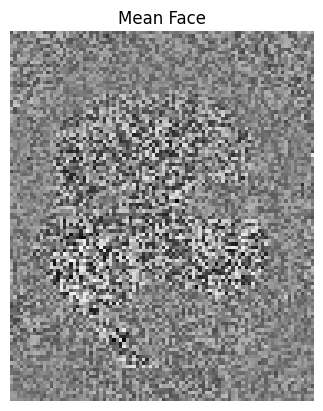

Displaying the first 10 eigenfaces


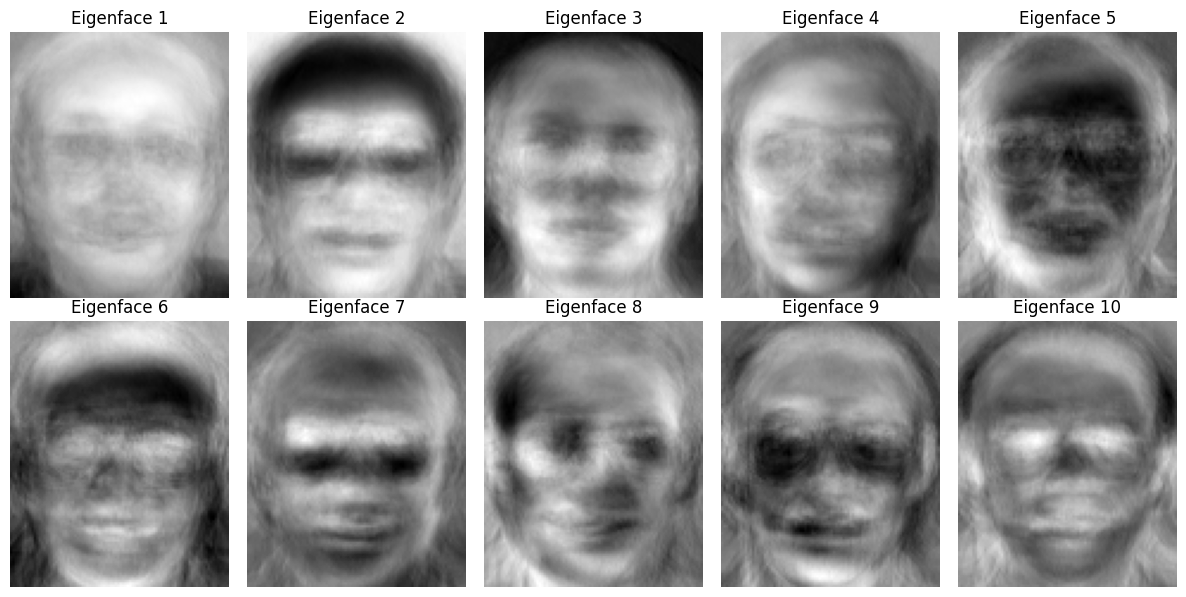

Starting image reconstruction in batches
Reconstructing images with k=5 principal components
Performing PCA to find top 5 components...
Computing eigen decomposition of covariance matrix
Top 5 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] 


Reconstruction k=5: 100%|██████████| 5/5 [00:00<00:00, 1000.02it/s]

Reconstruction done for k=5
Reconstructing images with k=10 principal components
Performing PCA to find top 10 components...


Computing eigen decomposition of covariance matrix
Top 10 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Reconstruction k=10: 100%|██████████| 5/5 [00:00<00:00, 2236.96it/s]

Reconstruction done for k=10
Reconstructing images with k=20 principal components
Performing PCA to find top 20 components...


Computing eigen decomposition of covariance matrix
Top 20 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Reconstruction k=20: 100%|██████████| 5/5 [00:00<00:00, 1666.92it/s]

Reconstruction done for k=20
Reconstructing images with k=50 principal components
Performing PCA to find top 50 components...


Computing eigen decomposition of covariance matrix
Top 50 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Reconstruction k=50: 100%|██████████| 5/5 [00:00<00:00, 2212.42it/s]

Reconstruction done for k=50
Reconstructing images with k=100 principal components
Performing PCA to find top 100 components...


Computing eigen decomposition of covariance matrix
Top 100 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Reconstruction k=100: 100%|██████████| 5/5 [00:00<00:00, 1664.14it/s]

Reconstruction done for k=100
Plotting original and reconstructed images


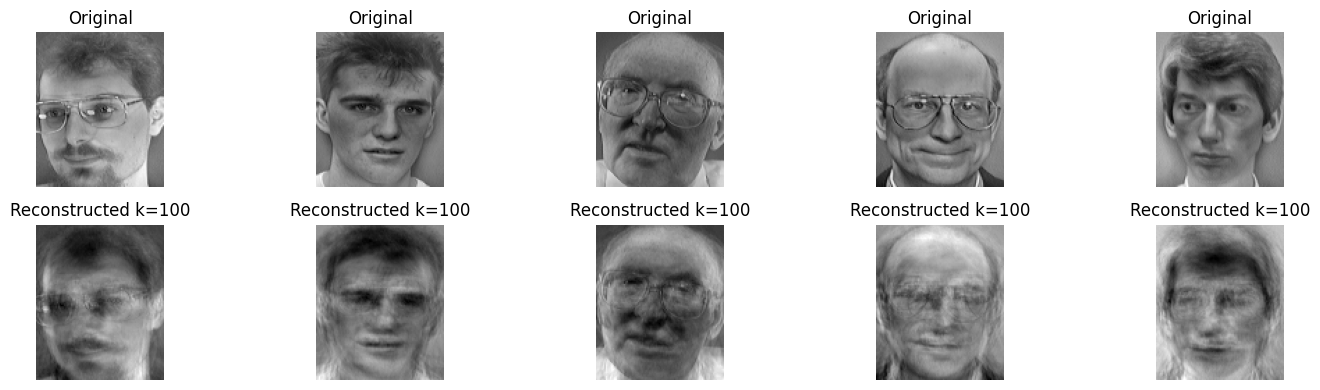

Starting face recognition using PCA features
Processing k=5
Performing PCA to find top 5 components...
Computing eigen decomposition of covariance matrix
Top 5 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] 


Testing k=5:   0%|          | 0/23 [00:00<?, ?it/s]

Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.29it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2501.08it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5002.75it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4999.17it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2501.37it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4997.98it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4999.17it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.88it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


Testing k=5:  43%|████▎     | 10/23 [00:00<00:00, 91.47it/s]

  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5003.94it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2495.72it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5008.72it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2497.80it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4997.98it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5002.75it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5005.14it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5002.75it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 1 samples


Testing k=5: 100%|██████████| 23/23 [00:00<00:00, 112.02it/s]


  Predicted 1/1 samples
Accuracy for k=5: 0.901
Processing k=10
Performing PCA to find top 10 components...
Computing eigen decomposition of covariance matrix
Top 10 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Testing k=10:   0%|          | 0/23 [00:00<?, ?it/s]

Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4895.31it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3490.02it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2462.02it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4964.85it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5012.31it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4983.73it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4763.01it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4298.32it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4943.78it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4771.68it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3572.05it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4946.11it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2280.26it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4995.60it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


Testing k=10:  87%|████████▋ | 20/23 [00:00<00:00, 189.89it/s]

  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4990.84it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 1 samples


Testing k=10: 100%|██████████| 23/23 [00:00<00:00, 190.65it/s]


  Predicted 1/1 samples
Accuracy for k=10: 0.946
Processing k=20
Performing PCA to find top 20 components...
Computing eigen decomposition of covariance matrix
Top 20 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Testing k=20:   0%|          | 0/23 [00:00<?, ?it/s]

Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4999.17it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.88it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4999.17it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4994.41it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.88it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4999.17it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


Testing k=20:  52%|█████▏    | 12/23 [00:00<00:00, 116.50it/s]

  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2500.48it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 9567.30it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4997.98it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2500.18it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.88it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2498.39it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 1 samples


Testing k=20: 100%|██████████| 23/23 [00:00<00:00, 133.50it/s]


  Predicted 1/1 samples
Accuracy for k=20: 0.973
Processing k=50
Performing PCA to find top 50 components...
Computing eigen decomposition of covariance matrix
Top 50 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Testing k=50:   0%|          | 0/23 [00:00<?, ?it/s]

Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4490.69it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4483.01it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3394.00it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4934.48it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


  Predicted 5/5 samples

NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4996.79it/s]



Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2048.60it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2490.68it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4516.80it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4997.98it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3756.99it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4899.89it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4697.92it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


Testing k=50:  70%|██████▉   | 16/23 [00:00<00:00, 159.79it/s]

  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4918.27it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4993.22it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3527.00it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4933.31it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3817.86it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 1 samples


Testing k=50: 100%|██████████| 23/23 [00:00<00:00, 162.28it/s]


  Predicted 1/1 samples
Accuracy for k=50: 0.973
Processing k=100
Performing PCA to find top 100 components...
Computing eigen decomposition of covariance matrix
Top 100 eigenvalues: [1675.21042124 1238.940647    872.75036564  596.51113084  479.17221165] ...


Testing k=100:   0%|          | 0/23 [00:00<?, ?it/s]

Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2509.16it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.88it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2499.29it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4994.41it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2490.09it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2501.08it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2041.42it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<?, ?it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4974.27it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4096.00it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3477.29it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


Testing k=100:  57%|█████▋    | 13/23 [00:00<00:00, 127.95it/s]

  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2043.81it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3774.57it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4497.43it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2025.45it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 2489.20it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4994.41it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 3509.29it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 4969.55it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 5 samples


NN Prediction: 100%|██████████| 5/5 [00:00<00:00, 5023.12it/s]


  Predicted 5/5 samples
Running nearest neighbor prediction for 1 samples


Testing k=100: 100%|██████████| 23/23 [00:00<00:00, 130.74it/s]


  Predicted 1/1 samples
Accuracy for k=100: 0.964
Plotting recognition accuracy


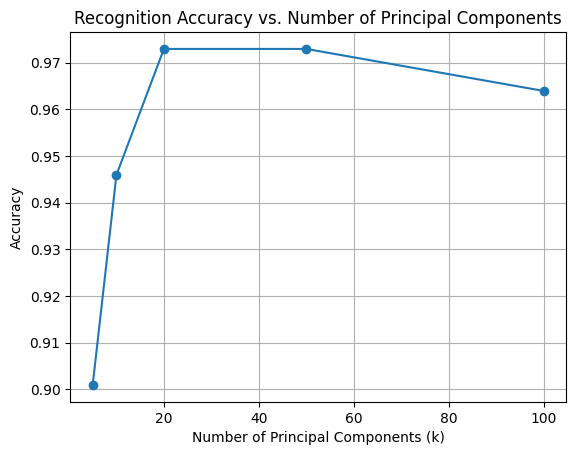

In [14]:
# Load images from training folder
print("Starting image loading...")
X, y = load_images('data/data/faces/training')
print(f"Loaded X shape: {X.shape}, y shape: {y.shape}")

# Split into train/test using CPU (NumPy/sklearn compatible)
print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

print("Standardizing data (zero mean, unit variance)")
mean_face = np.mean(X_train, axis=0)
std_face = np.std(X_train, axis=0)
print(f"Mean face shape: {mean_face.shape}, Std face shape: {std_face.shape}")

X_train_std = (X_train - mean_face) / std_face
X_test_std = (X_test - mean_face) / std_face
print("Standardization complete")

k = 50
print(f"Computing PCA with k={k}")
mean_face, eigenfaces, top_eigvals = pca_cpu(X_train_std, k)
print("PCA computation done")

print("Displaying mean face")
plt.figure()
plot_face(mean_face, title='Mean Face')
plt.show()

print("Displaying the first 10 eigenfaces")
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_face(eigenfaces[:,i], title=f'Eigenface {i+1}')
plt.tight_layout()
plt.show()

ks = [5, 10, 20, 50, 100]
recs = []
batch_size = 1  # further reduced batch size for reconstruction
print("Starting image reconstruction in batches")

for k_ in ks:
    print(f"Reconstructing images with k={k_} principal components")
    curr_mean, curr_eigvecs, _ = pca_cpu(X_train_std, k_)
    rec_batches = []
    for start_idx in tqdm(range(0, min(5, len(X_test_std)), batch_size), desc=f"Reconstruction k={k_}"):
        batch = X_test_std[start_idx : start_idx + batch_size]
        X_test_proj = project_faces(batch, curr_mean, curr_eigvecs)
        rec = reconstruct_faces(X_test_proj, curr_mean, curr_eigvecs)
        rec_batches.append(rec)
    recs.append(np.vstack(rec_batches))
    print(f"Reconstruction done for k={k_}")

print("Plotting original and reconstructed images")
plt.figure(figsize=(15,4))
for i in range(5):
    plt.subplot(2,5,i+1)
    plot_face(X_test_std[i]*std_face + mean_face, title='Original')
    plt.subplot(2,5,i+6)
    plot_face(recs[-1][i]*std_face + mean_face, title=f'Reconstructed k={ks[-1]}')
plt.tight_layout()
plt.show()


accs = []
print("Starting face recognition using PCA features")
for k_ in ks:
    print(f"Processing k={k_}")
    curr_mean, curr_eigvecs, _ = pca_cpu(X_train_std, k_)
    X_train_proj = project_faces(X_train_std, curr_mean, curr_eigvecs)

    preds = []
    batch_size = 5  # further reduced batch size for testing
    for start_idx in tqdm(range(0, len(X_test_std), batch_size), desc=f"Testing k={k_}"):
        batch = X_test_std[start_idx : start_idx + batch_size]
        X_test_proj = project_faces(batch, curr_mean, curr_eigvecs)
        preds_batch = nearest_neighbor_cpu(X_test_proj, X_train_proj, y_train)
        preds.extend(preds_batch)
    preds = np.array(preds)

    acc = (preds == y_test).mean()
    accs.append(acc)
    print(f"Accuracy for k={k_}: {acc:.3f}")

print("Plotting recognition accuracy")
plt.figure()
plt.plot(ks, accs, marker='o')
plt.title('Recognition Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## 6. t-SNE Visualization (CPU for sklearn)


In [15]:
import plotly.express as px
from sklearn.manifold import TSNE

print("Starting 3D t-SNE visualization...")

X_train_proj_cpu = project_faces(X_train_std, mean_face, eigenfaces)
y_train_cpu = y_train

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_train_tsne_3d = tsne_3d.fit_transform(X_train_proj_cpu)
print("3D t-SNE completed")

import pandas as pd
tsne_df = pd.DataFrame(X_train_tsne_3d, columns=["x", "y", "z"])
tsne_df["label"] = y_train_cpu

fig = px.scatter_3d(
    tsne_df, x="x", y="y", z="z",
    color="label",
    title="3D t-SNE of PCA Features",
    opacity=0.7
)

fig.show()

Starting 3D t-SNE visualization...
3D t-SNE completed


In [16]:
print("INTERPRETATION")
print("This plot shows how your data groups together in 3D space after PCA and t-SNE. Each cluster corresponds to samples of a certain label. Overlaps mean some classes look similar in feature space, while tighter clusters mean those classes are distinct")

INTERPRETATION
This plot shows how your data groups together in 3D space after PCA and t-SNE. Each cluster corresponds to samples of a certain label. Overlaps mean some classes look similar in feature space, while tighter clusters mean those classes are distinct
